In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import HTML, Image
from matplotlib import animation, rc
import matplotlib.pyplot as plt
rc('animation', html='html5')

## Resultados local

In [51]:
df = pd.read_csv('local.csv', header=None, names=["p", "n", "t_tqli", "t_total"] )

In [52]:
p_u = [2,4,6,8]
n_u = np.arange(49,100,10)
time_avg = np.zeros((len(p_u), len(n_u)))
mips = np.zeros((len(p_u), len(n_u)))
for i, p_i in enumerate(p_u):
    for j, n_i in enumerate(n_u):
        dft = df[(df['p'] == p_i)]
        cell = np.mean(dft[(dft['n'] == n_i)]['t_tqli'].values)
        time_avg[i][j] = cell
        cell = np.mean(dft[(dft['n'] == n_i)]['t_total'].values)
        mips[i][j] = 62338595549 / cell / 1e6

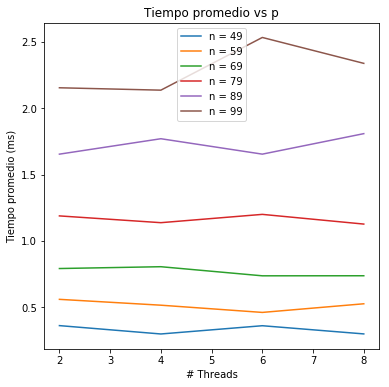

In [53]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
legend = []
for i in range(len(n_u)):
    ax.plot(p_u, time_avg[:,i] )
    legend.append("n = " + str(n_u[i]))
    ax.set_title("Tiempo promedio vs p")
ax.legend(legend)
ax.set_xlabel("# Threads")
ax.set_ylabel("Tiempo promedio (ms)")
fig.savefig("../docs/images/local_time_p.png")

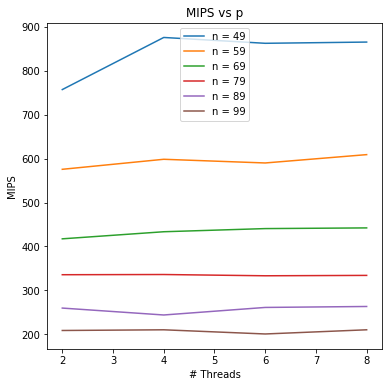

In [54]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
legend = []
for i in range(len(n_u)):
    ax.plot(p_u, mips[:,i] )
    legend.append("n = " + str(n_u[i]))
    ax.set_title("MIPS vs p")
ax.legend(legend)
ax.set_xlabel("# Threads")
ax.set_ylabel("MIPS")
fig.savefig("../docs/images/local_mips_p.png")

In [38]:
df = pd.read_csv('server_dedicated.csv')#, header = names=["p", "n", "t_tqli", "t_total"] )
#df = df.drop(df.index[0])

In [39]:
df

,tasks,N,time-tqli,time-all
0,4,99,8.550026,264.548672
1,4,199,38.724718,1079.772817
2,4,299,104.059739,2520.467913
3,4,399,217.850267,4622.147296
4,4,499,369.735701,7436.768397
5,4,599,596.151771,11033.266029
6,4,699,972.238255,16073.863624
7,4,799,1318.000137,20458.805394
8,4,899,1824.841994,26746.199256
9,4,999,2338.590954,34347.119354


In [32]:
df[(df['p'] == str(p_i))]
dft[(dft['n'] == str(n_i) )]
    


,p,n,t_tqli,t_total
1,4,99,2.259863,261.024399
41,4,99,2.255136,264.703852
81,4,99,2.247652,252.555393


In [40]:
p_u = [4,8,12,16]
n_u = np.arange(99,1000,100)
time_avg = np.zeros((len(p_u), len(n_u)))
mips = np.zeros((len(p_u), len(n_u)))
for i, p_i in enumerate(p_u):
    for j, n_i in enumerate(n_u):
        dft = df[(df['tasks'] == p_i)]
        cell = np.mean(dft[(dft['N'] == n_i)]['time-tqli'].values)
        time_avg[i][j] = cell
        cell = np.mean(dft[(dft['N'] == n_i)]['time-all'].values)
        mips[i][j] = 62338595549 / cell / 1e6

Text(0, 0.5, 'Tiempo promedio (ms)')

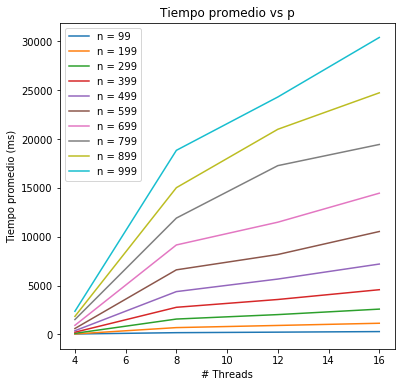

In [41]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
legend = []
for i in range(len(n_u)):
    ax.plot(p_u, time_avg[:,i] )
    legend.append("n = " + str(n_u[i]))
    ax.set_title("Tiempo promedio vs p")
ax.legend(legend)
ax.set_xlabel("# Threads")
ax.set_ylabel("Tiempo promedio (ms)")

## Resultados servidor

In [55]:
df = pd.read_csv('server.csv', header=None, names=["p", "n", "t_tqli", "t_total"] )

In [56]:
p_u = [2,4,6,8]
n_u = np.arange(49,100,10)
time_avg = np.zeros((len(p_u), len(n_u)))
mips = np.zeros((len(p_u), len(n_u)))
for i, p_i in enumerate(p_u):
    for j, n_i in enumerate(n_u):
        dft = df[(df['p'] == p_i)]
        cell = np.mean(dft[(dft['n'] == n_i)]['t_tqli'].values)
        time_avg[i][j] = cell
        cell = np.mean(dft[(dft['n'] == n_i)]['t_total'].values)
        mips[i][j] = 62338595549 / cell / 1e6

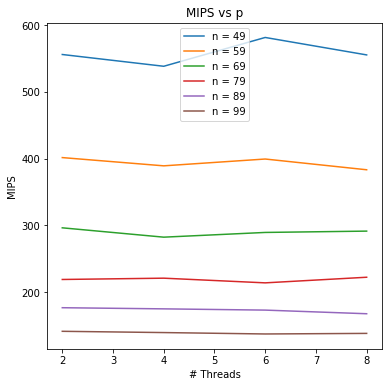

In [57]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
legend = []
for i in range(len(n_u)):
    ax.plot(p_u, mips[:,i] )
    legend.append("n = " + str(n_u[i]))
    ax.set_title("MIPS vs p")
ax.legend(legend)
ax.set_xlabel("# Threads")
ax.set_ylabel("MIPS")
fig.savefig("../docs/images/server_mips_p.png")

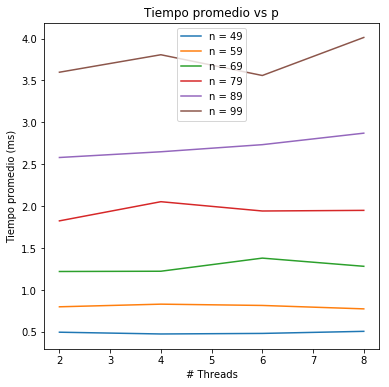

In [58]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
legend = []
for i in range(len(n_u)):
    ax.plot(p_u, time_avg[:,i] )
    legend.append("n = " + str(n_u[i]))
    ax.set_title("Tiempo promedio vs p")
ax.legend(legend)
ax.set_xlabel("# Threads")
ax.set_ylabel("Tiempo promedio (ms)")
fig.savefig("../docs/images/server_time_p.png")